## 範例
如何使用現有的 github 資源運行及學習 yolov3

In [0]:
%tensorflow_version 1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2
import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # 確保 colob 中使用的 tensorflow 是 1.x 版本而不是 tensorflow 2`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
1.15.2


In [0]:
from google.colab import drive 
drive.mount('/content/gdrive') # 將 google drive 掛載在 colob，
# 下載基於 keras 的 yolov3 程式碼
%cd 'gdrive/My Drive/colab/100_DL/D39'
!git clone https://github.com/qqwweee/keras-yolo3 # 如果之前已經下載過就可以註解掉
%cd keras-yolo3

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/My Drive/colab/100_DL/D39'
/content/gdrive/My Drive/colab/100_DL/D39/keras-yolo3/keras-yolo3
Cloning into 'keras-yolo3'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 151.07 KiB | 2.60 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/gdrive/My Drive/colab/100_DL/D39/keras-yolo3/keras-yolo3/keras-yolo3


In [0]:
import os
import subprocess
if not os.path.exists("model_data/yolo.h5"):
  # 下載 yolov3 的網路權重，並且把權重轉換為 keras 能夠讀取的格式
  print("Model doesn't exist, downloading...")
  os.system("wget https://pjreddie.com/media/files/yolov3.weights")
  print("Converting yolov3.weights to yolo.h5...")
  os.system("python convert.py yolov3.cfg yolov3.weights model_data/yolo.h5")
else:
  print("Model exist")

Model doesn't exist, downloading...
Converting yolov3.weights to yolo.h5...


In [0]:
# 下載圖片範例，如果已經下載過就可以註解掉
print(os.getcwd())
!wget https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true -O dog.jpg
!wget https://github.com/pjreddie/darknet/blob/master/data/horses.jpg?raw=true -O horses.jpg

/content/gdrive/My Drive/colab/100_DL/D39/keras-yolo3
--2020-05-03 08:26:00--  https://github.com/pjreddie/darknet/blob/master/data/dog.jpg?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pjreddie/darknet/raw/master/data/dog.jpg [following]
--2020-05-03 08:26:00--  https://github.com/pjreddie/darknet/raw/master/data/dog.jpg
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg [following]
--2020-05-03 08:26:00--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/dog.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP req

In [0]:
from yolo import YOLO # 從 yolo.py 中將該項目定義的 YOLO class 載入，其詳細定義請參考 yolo.py
from PIL import Image
os.getcwd()

'/content/gdrive/My Drive/colab/100_DL/D39/keras-yolo3'

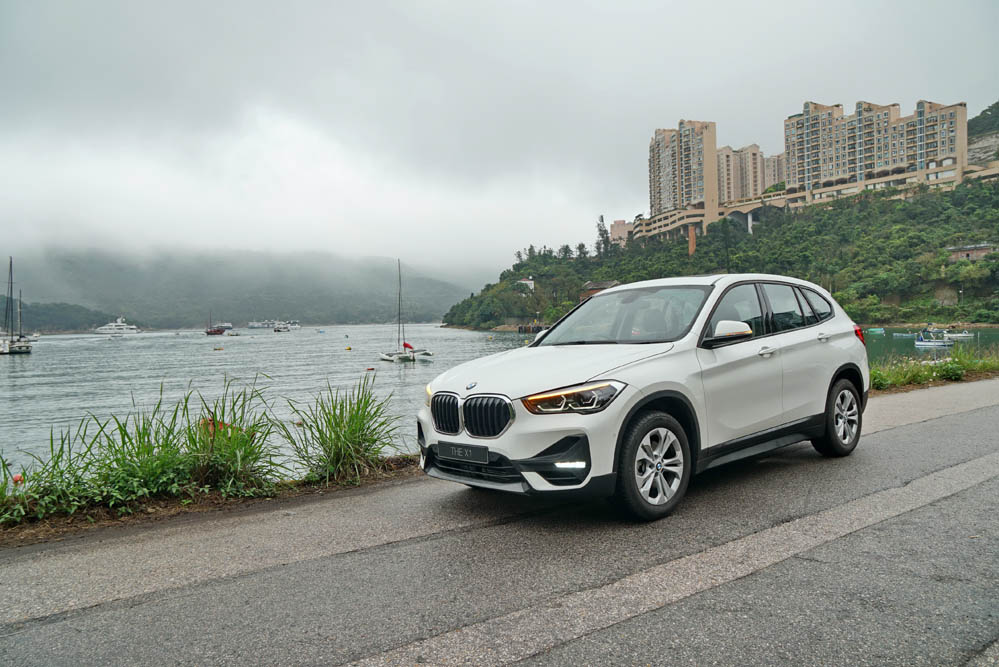

In [0]:
image = Image.open('car.jpg') # 讀取範例圖片
image

In [0]:
yolo = YOLO() # 初始化 YOLO class

model_data/yolo.h5 model, anchors, and classes loaded.


In [0]:
r_image = yolo.detect_image(image) # 執行 yolo 檢測，將回傳的圖片儲存在 r_image 中

(416, 416, 3)
Found 4 boxes for img
boat 0.48 (114, 316) (137, 333)
boat 0.52 (208, 321) (232, 333)
boat 0.56 (3, 257) (40, 355)
car 1.00 (410, 276) (871, 516)
1.6832984259999648


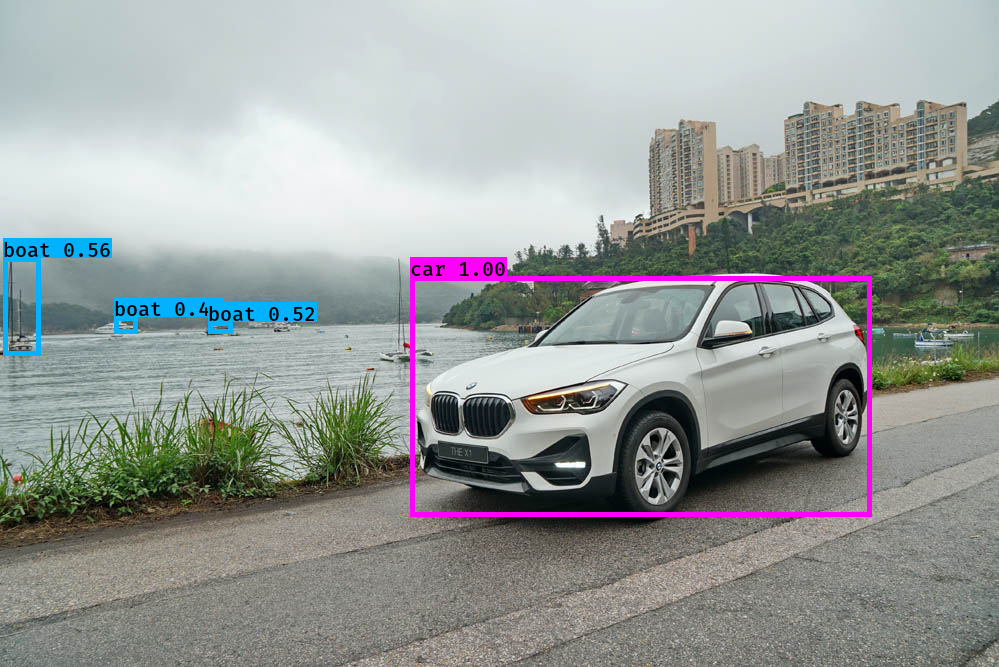

In [0]:
r_image # 顯示 r_image，可觀察到圖片上已畫上 yolov3 所檢測的 object

## 作業
該版本的 yolov3 實現邏輯主要寫在 `yolo.py` 中 `YOLO` 這個 class 的 `detect_image` ，其回傳已畫上檢測到的 bboxes 和物件類別的圖片。

1. 請嘗試閱讀及盡量理解 `detect_image` 的程式碼片段
2. 請修改/模仿 `detect_image` 的寫法，使其回傳 bboxes 的信息、信心度及 bboxes 對應的類別
